## BAGGING CLASSIFIER

### Bagging Classifier Sebelum SMOTE

In [89]:
!pip install pymysql sqlalchemy imbalanced-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from collections import Counter
from imblearn.over_sampling import SMOTE

# === 1. Koneksi ke database MySQL ===
host = "mysql-28cb1d4c-yotanalvintobing-psd.d.aivencloud.com"
port = 25478
user = "avnadmin"
password = "AVNS_e3Tzp6XE6YCGJ7fV9ku"
database = "defaultdb"

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

# === 2. Ambil dataset ===
query = "SELECT * FROM ecoli;"
df = pd.read_sql(query, engine)

print("Jumlah baris:", len(df))
print(df.head())

# === 3. Pisahkan fitur dan label ===
X = df[[f"feature{i}" for i in range(1, 8)]].values
y = df["class_label"].values


# === 5. Balancing dengan SMOTE (lebih stabil) ===
min_class_size = min(Counter(y).values())
n_neighbors = max(1, min_class_size - 1)

smote = SMOTE(random_state=42, k_neighbors=n_neighbors)
X_res, y_res = smote.fit_resample(X, y)




Jumlah baris: 336
   id_protein  feature1  feature2  feature3  feature4  feature5  feature6  \
0   AAS_ECOLI      0.44      0.52      0.48       0.5      0.43      0.47   
1   AAT_ECOLI      0.49      0.29      0.48       0.5      0.56      0.24   
2  ACEA_ECOLI      0.07      0.40      0.48       0.5      0.54      0.35   
3  ACEK_ECOLI      0.56      0.40      0.48       0.5      0.49      0.37   
4  ACKA_ECOLI      0.59      0.49      0.48       0.5      0.52      0.45   

   feature7 class_label  
0      0.54          im  
1      0.35          cp  
2      0.44          cp  
3      0.46          cp  
4      0.36          cp  


In [93]:
# ===============================
# 1. Library Import
# ===============================
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# ===============================
# 2. Cek distribusi kelas sebelum SMOTE
# ===============================
print("Distribusi kelas sebelum balancing:", Counter(y))

# Tentukan n_neighbors untuk SMOTE
min_class_size = min(Counter(y).values())
n_neighbors = max(1, min_class_size - 1)
print(f"Gunakan n_neighbors = {n_neighbors}")

# ===============================
# 3. Balancing dengan SMOTE
# ===============================
smote = SMOTE(random_state=42, k_neighbors=n_neighbors)
X_res, y_res = smote.fit_resample(X, y)
print("Distribusi kelas setelah balancing:", Counter(y_res))

# ===============================
# 4. Split Train-Test
# ===============================
# Data asli
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# ===============================
# 5. Klasifikasi Random Forest
# ===============================
# Data asli
rf_ori = RandomForestClassifier(n_estimators=100, random_state=42)
rf_ori.fit(X_train_ori, y_train_ori)
y_pred_ori = rf_ori.predict(X_test_ori)


# ===============================
# 6. Hitung metric
# ===============================
metrics_ori = {
    "Accuracy": accuracy_score(y_test_ori, y_pred_ori),
    "Precision (macro)": precision_score(y_test_ori, y_pred_ori, average="macro"),
    "Recall (macro)": recall_score(y_test_ori, y_pred_ori, average="macro"),
    "F1-score (macro)": f1_score(y_test_ori, y_pred_ori, average="macro")
}


# ===============================
# 7. Buat tabel perbandingan
# ===============================
results = pd.DataFrame({
    "Metric": list(metrics_ori.keys()),
    "Sebelum SMOTE": list(metrics_ori.values())
})

print("\n=== Perbandingan Random Forest Sebelum dan Sesudah SMOTE ===")
print(results)


Distribusi kelas sebelum balancing: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Gunakan n_neighbors = 1
Distribusi kelas setelah balancing: Counter({'im': 143, 'cp': 143, 'pp': 143, 'imU': 143, 'imS': 143, 'om': 143, 'imL': 143, 'omL': 143})

=== Perbandingan Random Forest Sebelum dan Sesudah SMOTE ===
              Metric  Sebelum SMOTE
0           Accuracy       0.861386
1  Precision (macro)       0.661615
2     Recall (macro)       0.624547
3   F1-score (macro)       0.636830


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Bagging Classifier sesudah smote


In [98]:
# Data setelah SMOTE
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Data setelah SMOTE
rf_bal = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = rf_bal.predict(X_test_bal)

metrics_bal = {
    "Accuracy": accuracy_score(y_test_bal, y_pred_bal),
    "Precision (macro)": precision_score(y_test_bal, y_pred_bal, average="macro"),
    "Recall (macro)": recall_score(y_test_bal, y_pred_bal, average="macro"),
    "F1-score (macro)": f1_score(y_test_bal, y_pred_bal, average="macro")
}

results = pd.DataFrame({
    "Metric": list(metrics_ori.keys()),
    "Setelah SMOTE": list(metrics_bal.values())
})

print("\n=== Perbandingan Random Forest Sebelum dan Sesudah SMOTE ===")
print(results)




=== Perbandingan Random Forest Sebelum dan Sesudah SMOTE ===
              Metric  Setelah SMOTE
0           Accuracy       0.962209
1  Precision (macro)       0.963676
2     Recall (macro)       0.962209
3   F1-score (macro)       0.962126


### Perbandingan Sebelum dan sesudah SMOTE

Distribusi kelas sebelum balancing: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Gunakan n_neighbors = 1
Distribusi kelas setelah balancing: Counter({'im': 143, 'cp': 143, 'pp': 143, 'imU': 143, 'imS': 143, 'om': 143, 'imL': 143, 'omL': 143})

=== Tabel Perbandingan Sebelum & Sesudah SMOTE ===
              Metric  Sebelum SMOTE  Sesudah SMOTE
0           Accuracy       0.841584       0.950581
1  Precision (macro)       0.640134       0.952832
2     Recall (macro)       0.604235       0.950581
3   F1-score (macro)       0.615055       0.950433


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


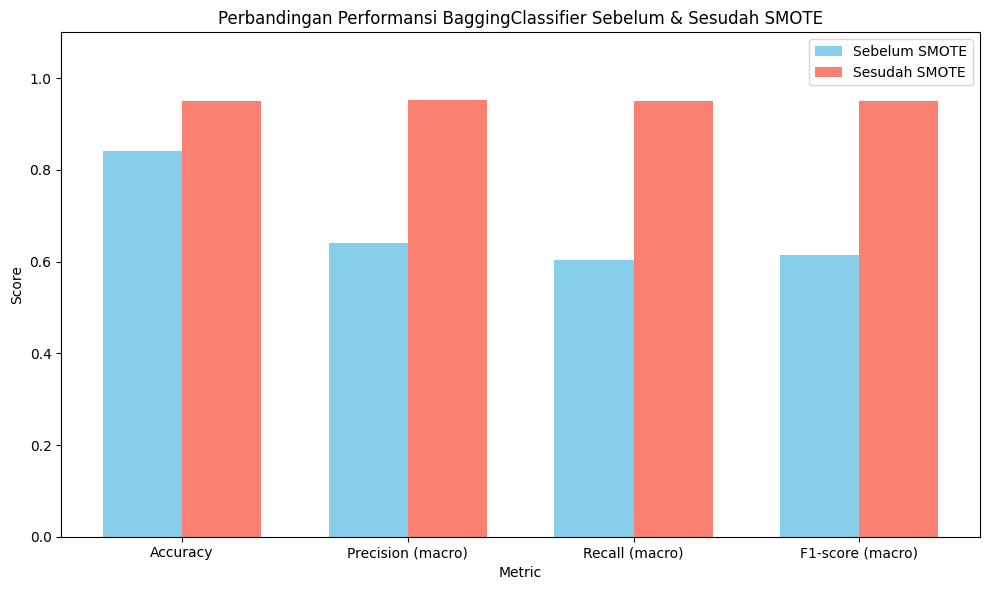

In [99]:
# ===============================
# 1. Library Import
# ===============================
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# ===============================
# 2. Cek distribusi kelas sebelum SMOTE
# ===============================
print("Distribusi kelas sebelum balancing:", Counter(y))

# Tentukan n_neighbors untuk SMOTE
min_class_size = min(Counter(y).values())
n_neighbors = max(1, min_class_size - 1)
print(f"Gunakan n_neighbors = {n_neighbors}")

# ===============================
# 3. Balancing dengan SMOTE
# ===============================
smote = SMOTE(random_state=42, k_neighbors=n_neighbors)
X_res, y_res = smote.fit_resample(X, y)
print("Distribusi kelas setelah balancing:", Counter(y_res))

# ===============================
# 4. Split Train-Test
# ===============================
# Data asli
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Data setelah SMOTE
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ===============================
# 5. Train BaggingClassifier
# ===============================
# Data asli
bag_ori = BaggingClassifier(n_estimators=100, random_state=42)
bag_ori.fit(X_train_ori, y_train_ori)
y_pred_ori = bag_ori.predict(X_test_ori)

# Data setelah SMOTE
bag_bal = BaggingClassifier(n_estimators=100, random_state=42)
bag_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = bag_bal.predict(X_test_bal)

# ===============================
# 6. Hitung metric
# ===============================
metrics_ori = {
    "Accuracy": accuracy_score(y_test_ori, y_pred_ori),
    "Precision (macro)": precision_score(y_test_ori, y_pred_ori, average="macro"),
    "Recall (macro)": recall_score(y_test_ori, y_pred_ori, average="macro"),
    "F1-score (macro)": f1_score(y_test_ori, y_pred_ori, average="macro")
}

metrics_bal = {
    "Accuracy": accuracy_score(y_test_bal, y_pred_bal),
    "Precision (macro)": precision_score(y_test_bal, y_pred_bal, average="macro"),
    "Recall (macro)": recall_score(y_test_bal, y_pred_bal, average="macro"),
    "F1-score (macro)": f1_score(y_test_bal, y_pred_bal, average="macro")
}

# ===============================
# 7. Buat tabel perbandingan
# ===============================
results = pd.DataFrame({
    "Metric": list(metrics_ori.keys()),
    "Sebelum SMOTE": list(metrics_ori.values()),
    "Sesudah SMOTE": list(metrics_bal.values())
})

print("\n=== Tabel Perbandingan Sebelum & Sesudah SMOTE ===")
print(results)

# ===============================
# 8. Visualisasi Bar Chart
# ===============================
fig, ax = plt.subplots(figsize=(10,6))
bar_width = 0.35
index = np.arange(len(results))

ax.bar(index, results["Sebelum SMOTE"], bar_width, label="Sebelum SMOTE", color="skyblue")
ax.bar(index + bar_width, results["Sesudah SMOTE"], bar_width, label="Sesudah SMOTE", color="salmon")

ax.set_xlabel("Metric")
ax.set_ylabel("Score")
ax.set_title("Perbandingan Performansi BaggingClassifier Sebelum & Sesudah SMOTE")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(results["Metric"])
ax.set_ylim(0, 1.1)  # Skala 0-1
ax.legend()
plt.tight_layout()
plt.show()


### Perbandingan Seluruh Model Clasifier

          Classifier  Sebelum SMOTE  Sesudah SMOTE
0        Naive Bayes       0.831683       0.776163
1      Random Forest       0.861386       0.962209
2  BaggingClassifier       0.841584       0.950581


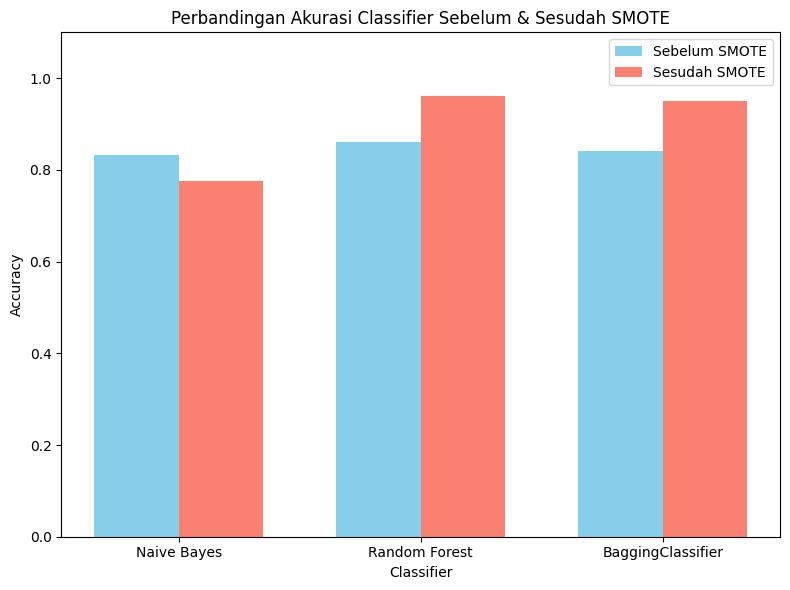

In [100]:
# ===============================
# 1. Library Import
# ===============================
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ===============================
# 2. SMOTE (balancing data)
# ===============================
min_class_size = min(Counter(y).values())
n_neighbors = max(1, min_class_size - 1)
smote = SMOTE(random_state=42, k_neighbors=n_neighbors)
X_res, y_res = smote.fit_resample(X, y)

# ===============================
# 3. Split Train-Test
# ===============================
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ===============================
# 4. Train & Predict Naive Bayes
# ===============================
nb = GaussianNB()
nb.fit(X_train_ori, y_train_ori)
y_pred_nb_ori = nb.predict(X_test_ori)
nb.fit(X_train_bal, y_train_bal)
y_pred_nb_bal = nb.predict(X_test_bal)

# ===============================
# 5. Train & Predict Random Forest
# ===============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_ori, y_train_ori)
y_pred_rf_ori = rf.predict(X_test_ori)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf_bal = rf.predict(X_test_bal)

# ===============================
# 6. Train & Predict BaggingClassifier
# ===============================
bag = BaggingClassifier(n_estimators=100, random_state=42)
bag.fit(X_train_ori, y_train_ori)
y_pred_bag_ori = bag.predict(X_test_ori)
bag.fit(X_train_bal, y_train_bal)
y_pred_bag_bal = bag.predict(X_test_bal)

# ===============================
# 7. Hitung akurasi
# ===============================
accuracy_data = {
    "Classifier": ["Naive Bayes", "Random Forest", "BaggingClassifier"],
    "Sebelum SMOTE": [
        accuracy_score(y_test_ori, y_pred_nb_ori),
        accuracy_score(y_test_ori, y_pred_rf_ori),
        accuracy_score(y_test_ori, y_pred_bag_ori)
    ],
    "Sesudah SMOTE": [
        accuracy_score(y_test_bal, y_pred_nb_bal),
        accuracy_score(y_test_bal, y_pred_rf_bal),
        accuracy_score(y_test_bal, y_pred_bag_bal)
    ]
}

df_accuracy = pd.DataFrame(accuracy_data)
print(df_accuracy)

# ===============================
# 8. Visualisasi Bar Chart
# ===============================
fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.35
index = np.arange(len(df_accuracy))

ax.bar(index, df_accuracy["Sebelum SMOTE"], bar_width, label="Sebelum SMOTE", color="skyblue")
ax.bar(index + bar_width, df_accuracy["Sesudah SMOTE"], bar_width, label="Sesudah SMOTE", color="salmon")

ax.set_xlabel("Classifier")
ax.set_ylabel("Accuracy")
ax.set_title("Perbandingan Akurasi Classifier Sebelum & Sesudah SMOTE")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_accuracy["Classifier"])
ax.set_ylim(0, 1.1)
ax.legend()
plt.tight_layout()
plt.show()
